# <center><b><h1>NeuralNetwork (First Run)</h1></b></center>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
import pandas as pd
from sklearn.externals import joblib
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
import itertools

from sklearn.neural_network import MLPClassifier

## 1. Prepare the data

In [2]:
df_X_train = pd.read_csv("../Data/X_train.csv", index_col=0)
df_X_train.shape

(516, 16)

In [3]:
df_y_train = pd.read_csv("../Data/y_train.csv", index_col=0)
df_y_train.shape

(516, 1)

In [4]:
df_X_val = pd.read_csv("../Data/X_val.csv", index_col=0)
df_X_val.shape

(30777, 16)

In [5]:
df_y_val = pd.read_csv("../Data/y_val.csv", index_col=0)
df_y_val.shape

(30777, 1)

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 False Positive Rate based

In [6]:
best_score_sl = 2
actual_score = 1
best_i_sl = 0
for i in range(32,1,-1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    tn, fp, fn, tp = confusion_matrix(df_y_val['Class'].values,predictions).ravel()
    actual_score = fp / float(tn+fp)
    if actual_score < best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
        print(confusion_matrix(df_y_val['Class'].values,predictions))
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

[[21795  8929]
 [   27    26]]
I:  32 Best_I:  32 Best_Score:  0.29061971097513345 Actual_Score:  0.29061971097513345
I:  31 Best_I:  32 Best_Score:  0.29061971097513345 Actual_Score:  0.30731675563077726
[[21941  8783]
 [   35    18]]
I:  30 Best_I:  30 Best_Score:  0.28586772555656814 Actual_Score:  0.28586772555656814
[[22073  8651]
 [   37    16]]
I:  29 Best_I:  29 Best_Score:  0.28157140997265984 Actual_Score:  0.28157140997265984
I:  28 Best_I:  29 Best_Score:  0.28157140997265984 Actual_Score:  0.2994401770602786
I:  27 Best_I:  29 Best_Score:  0.28157140997265984 Actual_Score:  0.3112875927613592
I:  26 Best_I:  29 Best_Score:  0.28157140997265984 Actual_Score:  0.3071865642494467
I:  25 Best_I:  29 Best_Score:  0.28157140997265984 Actual_Score:  0.2838172113006119
I:  24 Best_I:  29 Best_Score:  0.28157140997265984 Actual_Score:  0.2876578570498633
I:  23 Best_I:  29 Best_Score:  0.28157140997265984 Actual_Score:  0.28160395781799247
[[22081  8643]
 [   26    27]]
I:  22 Best

In [7]:
best_score_twol = 2
actual_score = 1
best_i_twol = best_j_twol = 0
for i in range(32,2,-1):
    for j in range(32,2,-1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        tn, fp, fn, tp = confusion_matrix(df_y_val['Class'].values,predictions).ravel()
        actual_score = fp / float(tn+fp)
        if actual_score < best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
            print(confusion_matrix(df_y_val['Class'].values,predictions))
            print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

[[22195  8529]
 [   32    21]]
I,J:  32 - 32
[[22331  8393]
 [   35    18]]
I,J:  32 - 28
[[22417  8307]
 [   30    23]]
I,J:  32 - 20
[[22699  8025]
 [   31    22]]
I,J:  32 - 15
[[22882  7842]
 [   35    18]]
I,J:  32 - 7
[[25167  5557]
 [   43    10]]
I,J:  32 - 3
Best_I:  32 Best_J:  3 Best_Score:  0.18086837651347482 Actual_Score:  0.18086837651347482
Best_I:  32 Best_J:  3 Best_Score:  0.18086837651347482 Actual_Score:  0.28186434058065357
Best_I:  32 Best_J:  3 Best_Score:  0.18086837651347482 Actual_Score:  0.2686499153756021
Best_I:  32 Best_J:  3 Best_Score:  0.18086837651347482 Actual_Score:  0.23750162739226663
Best_I:  32 Best_J:  3 Best_Score:  0.18086837651347482 Actual_Score:  0.2786421038927223
Best_I:  32 Best_J:  3 Best_Score:  0.18086837651347482 Actual_Score:  0.3314672568675954
Best_I:  32 Best_J:  3 Best_Score:  0.18086837651347482 Actual_Score:  0.32528316625439396
Best_I:  32 Best_J:  3 Best_Score:  0.18086837651347482 Actual_Score:  0.2995052727509439
Best_I: 

## 3 Find the best random state for both single layer and two layers

In [8]:
best_score_sl = 2
actual_score = 1
best_random_state_sl = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    tn, fp, fn, tp = confusion_matrix(df_y_val['Class'].values,predictions).ravel()
    actual_score = fp / float(tn+fp)
    if actual_score < best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.08068610857961203 Actual_Score:  0.08068610857961203
I:  2 Best_Random_State:  1 Best_Score:  0.08068610857961203 Actual_Score:  0.15593672698867336
I:  3 Best_Random_State:  3 Best_Score:  0.05839083452675433 Actual_Score:  0.05839083452675433
I:  4 Best_Random_State:  3 Best_Score:  0.05839083452675433 Actual_Score:  0.07902616846764744
I:  5 Best_Random_State:  5 Best_Score:  0.03733237859653691 Actual_Score:  0.03733237859653691
I:  6 Best_Random_State:  5 Best_Score:  0.03733237859653691 Actual_Score:  0.10330686108579612
I:  7 Best_Random_State:  7 Best_Score:  0.03459835958859524 Actual_Score:  0.03459835958859524
I:  8 Best_Random_State:  7 Best_Score:  0.03459835958859524 Actual_Score:  0.04680380158833485
I:  9 Best_Random_State:  7 Best_Score:  0.03459835958859524 Actual_Score:  0.05100247363624528
I:  10 Best_Random_State:  10 Best_Score:  0.0 Actual_Score:  0.0
I:  11 Best_Random_State:  10 Best_Score:  0.0 Actual_Score:  0.205149

In [9]:
best_score_twol = 2
actual_score = 1
best_random_state_twol = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    tn, fp, fn, tp = confusion_matrix(df_y_val['Class'].values,predictions).ravel()
    actual_score = fp / float(tn+fp)
    if actual_score < best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0
I:  2 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0025061840906132012
I:  3 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0
I:  4 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0
I:  5 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0
I:  6 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0
I:  7 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.06926181486785575
I:  8 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0
I:  9 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0067374039838562685
I:  10 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0
I:  11 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0
I:  12 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.06415180315063143
I:  13 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0
I:  14 Best_Random_State:  1 Best_Score:  0.0 Actual_Score:  0.0
I:  15 Best_Random_State:  1 Be

## 4. Compute metrics on the best architecture

In [10]:
if best_score_sl < best_score_twol:
    best_architecture = "Single Layer"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  Two Layers
For the layer  1  the best number of neurons is :  1
For the layer  2  the best number of neurons is :  1


### 4.3 Confusion Matrix

In [11]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)

[[30724     0]
 [   53     0]]


In [12]:
print(classification_report(df_y_val['Class'].values,predictions,target_names=['Non-Fracture','Fracture']))

              precision    recall  f1-score   support

Non-Fracture       1.00      1.00      1.00     30724
    Fracture       0.00      0.00      0.00        53

   micro avg       1.00      1.00      1.00     30777
   macro avg       0.50      0.50      0.50     30777
weighted avg       1.00      1.00      1.00     30777



/Users/erennio/anaconda2/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 4.2 Accuracy

In [13]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.9982779348214575


### 4.3 Recall (or Sensitivity)

In [14]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.0


### 4.4 Error

In [15]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.001722065178542418


### 4.5 Specificity

In [16]:
specificity = tn / (tn+fp)

print(specificity)

1.0


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [17]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.0
0.0


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [18]:
precision = tp / float(tp+fp)

print(precision)

nan


/Users/erennio/anaconda2/envs/Python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


## 5. Metrics visualization

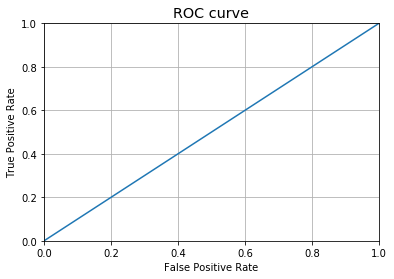

In [19]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 6. Creation new dataframe

In [20]:
mod_df = pd.DataFrame(df_X_val)

In [21]:
mod_df.head()

,sex,age,weight,height,HIPX,menopause,HRT,smoking,ReumatoidArthritis,SecondaryOsteoporsis,Alcohol,VitaminD,calcium,dose_walk,dose_moderate,dose_vigorous
149978,-1.029482,0.152632,-1.383228,-1.438686,-0.037838,1.436838,-0.423252,-0.808640,-0.08895,-0.134216,-0.612333,-0.141958,0.115530,-0.259297,-0.462525,-0.538945
43265,0.971362,-1.957990,0.637841,1.770734,-0.037838,-0.695973,-0.423252,0.760768,-0.08895,-0.134216,0.104979,1.276093,0.113305,-0.637774,-0.611945,0.201583
116861,0.971362,1.145866,2.161613,1.498749,-0.037838,-0.695973,-0.423252,0.760768,-0.08895,-0.134216,0.104979,-0.504631,-0.366965,-0.493062,0.583416,-0.353813
46479,0.971362,-0.716448,-0.803047,0.845986,-0.037838,-0.695973,-0.423252,2.330176,-0.08895,-0.134216,3.056626,-1.030506,-0.598176,-0.504194,-0.462525,-0.168681
115581,-1.029482,-0.095676,0.274431,0.737192,-0.037838,1.436838,-0.423252,-0.808640,-0.08895,-0.134216,0.397031,-0.874557,-0.343833,-0.593247,-0.562138,-0.508090


In [22]:
mod_df['real_class'] = df_y_val
mod_df['predicted_class'] = predictions

In [23]:
mod_df.head()

,sex,age,weight,height,HIPX,menopause,HRT,smoking,ReumatoidArthritis,SecondaryOsteoporsis,Alcohol,VitaminD,calcium,dose_walk,dose_moderate,dose_vigorous,real_class,predicted_class
149978,-1.029482,0.152632,-1.383228,-1.438686,-0.037838,1.436838,-0.423252,-0.808640,-0.08895,-0.134216,-0.612333,-0.141958,0.115530,-0.259297,-0.462525,-0.538945,0,0
43265,0.971362,-1.957990,0.637841,1.770734,-0.037838,-0.695973,-0.423252,0.760768,-0.08895,-0.134216,0.104979,1.276093,0.113305,-0.637774,-0.611945,0.201583,0,0
116861,0.971362,1.145866,2.161613,1.498749,-0.037838,-0.695973,-0.423252,0.760768,-0.08895,-0.134216,0.104979,-0.504631,-0.366965,-0.493062,0.583416,-0.353813,0,0
46479,0.971362,-0.716448,-0.803047,0.845986,-0.037838,-0.695973,-0.423252,2.330176,-0.08895,-0.134216,3.056626,-1.030506,-0.598176,-0.504194,-0.462525,-0.168681,0,0
115581,-1.029482,-0.095676,0.274431,0.737192,-0.037838,1.436838,-0.423252,-0.808640,-0.08895,-0.134216,0.397031,-0.874557,-0.343833,-0.593247,-0.562138,-0.508090,0,0


In [24]:
mod_df_complete = mod_df[(mod_df['real_class'] == 0) & ( mod_df['predicted_class']==1)]

In [25]:
mod_df_complete['Class'] = mod_df['real_class']
mod_df_complete = mod_df_complete.drop(['real_class','predicted_class'],axis=1)
mod_df_complete.shape

/Users/erennio/anaconda2/envs/Python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(30777, 17)

In [26]:
std_patients = pd.read_csv('../Data/standardized_patients.csv', index_col=0)
std_patients.shape

(153884, 17)

for index in mod_df_complete.index.values:
    feature_to_check = std_patients.loc[index].round(10) == mod_df_complete.loc[index].round(10)
    for check in feature_to_check:
        if not check:
            print(index, feature_to_check)

In [27]:
for index in mod_df_complete.index.values:
    equals = True
    patient = std_patients.loc[index].round(10) == mod_df_complete.loc[index].round(10)
    for feature in patient:
        if not feature:
            equals = False
            print(std_patients.loc[index].round(10) == giorgiONE.loc[index].round(10), index)
    if equals:
        std_patients.loc[index,'Class'] = 1        
    

NameError: name 'giorgiONE' is not defined

In [ ]:
std_patients.loc[mod_df_complete.index.values,'Class'].shape

In [ ]:
std_patients.to_csv('../Data/specficity_new_std_patients.csv')